In [5]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from math import *
import pprint

In [6]:
all_data = pd.DataFrame()
for f in glob.glob("./RelatorioQualidadeAguasSuperficiais.xlsx"):
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=True)

In [18]:
all_data

,Período DE,Período ATE,Cod_Interaguas,Tipo Rede,UGRHI,Código Ponto,Status Ponto,Data Coleta,Hora Coleta,Parametro,...,CLASSE,Município,UF,Inicio Operação,Fim Operação,Latitude,Longitude,Altitude,Localização,Captação


In [8]:
all_data['Parametro'].value_counts()

Chuvas nas últimas 24h                     26
Ens. Ecotoxic. c/ Vibrio fischeri          26
pH                                         26
Nitrogênio-Nitrato                         26
Cloreto Total                              26
Sólido Total                               26
Turbidez                                   26
Carbono Orgânico Total                     26
Sólido Dissolvido Total                    26
Nitrogênio Amoniacal                       26
Fósforo Total                              26
Oxigênio Dissolvido                        26
Coloração                                  26
Condutividade                              26
Temperatura da Água                        26
Escherichia coli**                         26
Temperatura do Ar                          26
Nitrogênio-Nitrito                         25
Cádmio Total                               24
Bário Total                                24
Mercúrio Total                             24
Potássio                          

In [9]:
clean_data = all_data.drop(columns=['Cod_Interaguas', 'Código Ponto', 'Status Ponto', 'Tipo Rede', 'Período DE', 'Período ATE', 'CLASSE', 'Inicio Operação', 'UF', 'Fim Operação', 'Latitude', 'Longitude', 'Captação', 'Localização', 'Município', 'Tipo de Sistema Hídrico', 'UGRHI', 'Sistema Hídrico', 'Altitude', 'Sinal'])
clean_data['Valor'] = clean_data['Valor'].str.replace(',','.')
res = clean_data[pd.to_numeric(clean_data['Valor'], errors='coerce').notnull()]
res1 = res.copy()
res1['Valor'] = res['Valor'].astype(float)

In [10]:
list_IQA = ['pH', 'Fósforo Total', 'Coliformes Termotolerantes', 'DBO (5, 20)', 'Oxigênio Dissolvido', 'Temperatura da Água', 'Nitrogênio Total', 'Fósforo Total', 'Turbidez', 'Sólido Total']
IQA_table = res1[res1['Parametro'].isin(list_IQA)]
IQA_sem_sol = ['pH', 'Fósforo Total', 'DBO (5, 20)', 'Oxigênio Dissolvido', 'Temperatura da Água', 'Nitrogênio Total', 'Fósforo Total', 'Turbidez']
SS_table = res1[res1['Parametro'].isin(IQA_sem_sol)]

In [11]:
pH_table = res1[res1["Parametro"] == 'pH']
coli_termo_table = res1[res1["Parametro"] == 'Coliformes Termotolerantes']
fosforo_table = res1[res1["Parametro"] == 'Fósforo Total']
O2_table = res1[res1["Parametro"] == 'Oxigênio Dissolvido']
turbidez_table = res1[res1["Parametro"] == 'Turbidez']
DBO_table = res1[res1["Parametro"] == 'DBO (5, 20)']
temp = res1[res1["Parametro"] == 'Temperatura da Água']
nit_total = res1[res1["Parametro"] == 'Nitrogênio Total']
fos_total = res1[res1["Parametro"] == 'Fósforo Total']
sol_total = res1[res1["Parametro"] == 'Sólido Total']
temp_ar = res1[res1["Parametro"] == 'Temperatura do Ar']
coliformes_termotolerantes_table= res1[res1["Parametro"] == 'Escherichia coli**']
coliformes_termotolerantes_table['Valor']*=1.25
coliformes_termotolerantes_table['Valor_log'] = np.log10(coliformes_termotolerantes_table['Valor'])
coliformes_termotolerantes_table['Valor'] = coliformes_termotolerantes_table['Valor_log']
#O2_table

<ipython-input-11-6ca01f0cb1d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coliformes_termotolerantes_table['Valor']*=1.25
<ipython-input-11-6ca01f0cb1d2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coliformes_termotolerantes_table['Valor_log'] = np.log10(coliformes_termotolerantes_table['Valor'])
<ipython-input-11-6ca01f0cb1d2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [12]:
temp_delta_t = temp.copy()
# temp_delta_t['teste'] = temp_ar['Valor'] - temp['Valor']
# temp_delta_t['testea'] = temp_delta_t['Valor'] - temp_delta_t['Valor']
temp_delta_t['Temperatura_ar'] = temp_ar['Valor']
temp_delta_t['Temperatura_agua'] = temp['Valor']



In [13]:
sns.set(font_scale=1)
# with sns.axes_style("darkgrid"):
#     fig, (ax1,ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9,1, figsize=(15, 20))

#     ax1.set_title('pH')
#     sns.lineplot(x='Data Coleta', y='Valor', data=pH_table, ax=ax1)

#     ax2.set_title('Oxigênio Dissolvido')
#     sns.lineplot(x='Data Coleta', y='Valor', data=O2_table, ax=ax2)

#     ax3.set_title('Fósforo Total')
#     sns.lineplot(x='Data Coleta', y='Valor', data=fosforo_table, ax=ax3)

#     ax4.set_title('DBO (5, 20)')
#     sns.lineplot(x='Data Coleta', y='Valor', data=DBO_table, ax=ax4)
    
#     ax5.set_title('Temperatura da Água')
#     sns.lineplot(x='Data Coleta', y='Valor', data=temp, ax=ax5)
    
#     ax6.set_title('Nitrogênio Total')
#     sns.lineplot(x='Data Coleta', y='Valor', data=nit_total, ax=ax6)
    
#     ax7.set_title('Fósforo Total')
#     sns.lineplot(x='Data Coleta', y='Valor', data=fos_total, ax=ax7)
    
#     ax8.set_title('Sólido Total')
#     sns.lineplot(x='Data Coleta', y='Valor', data=sol_total, ax=ax8)
    
#     ax9.set_title('Turbidez')
#     sns.lineplot(x='Data Coleta', y='Valor', data=turbidez_table, ax=ax9)
    
            
#     plt.gcf().autofmt_xdate()
#     plt.show()

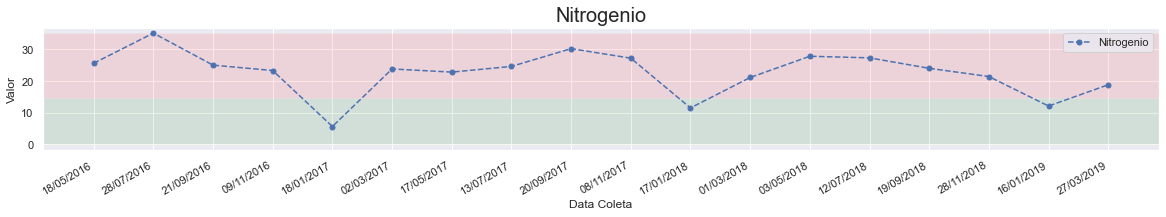

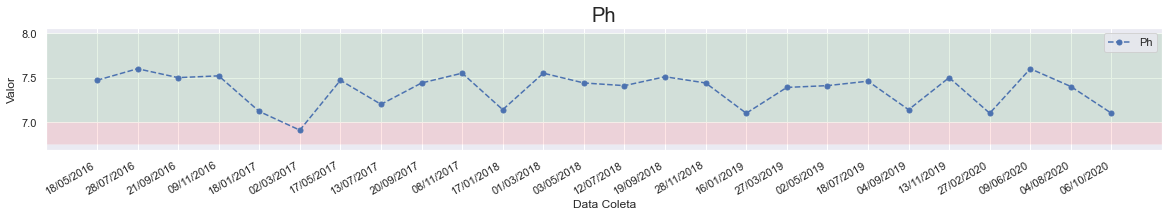

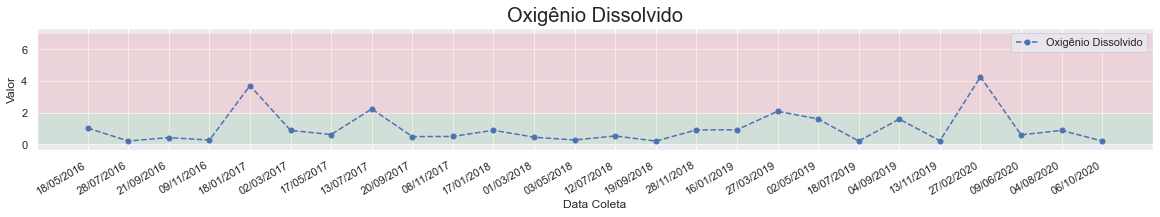

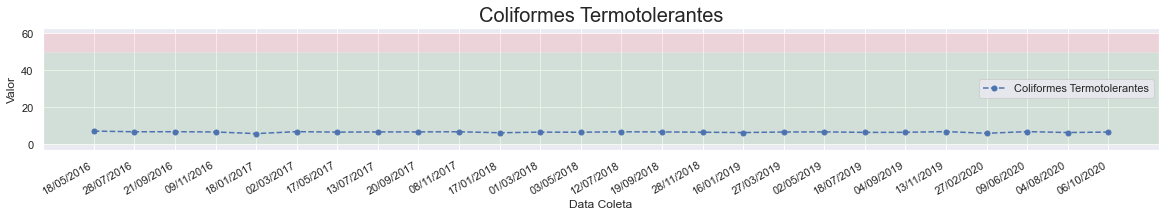

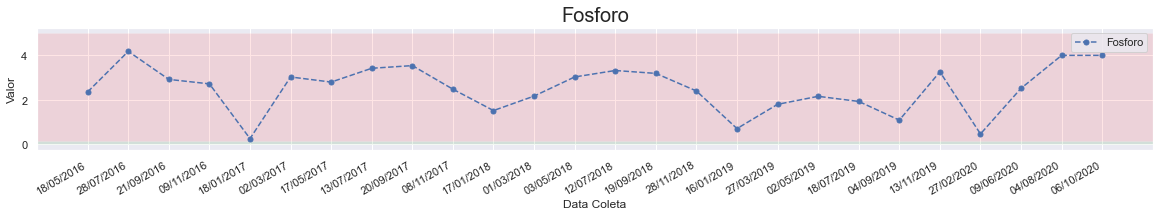

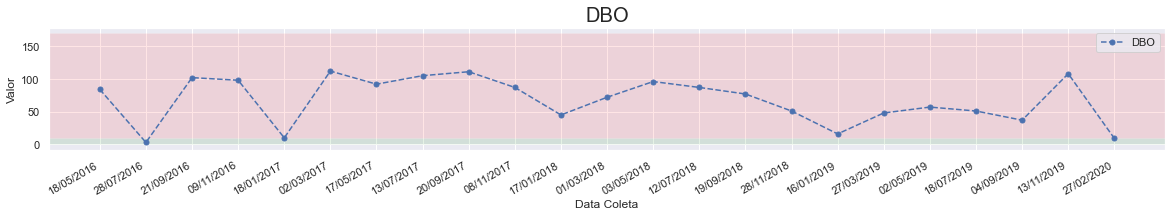

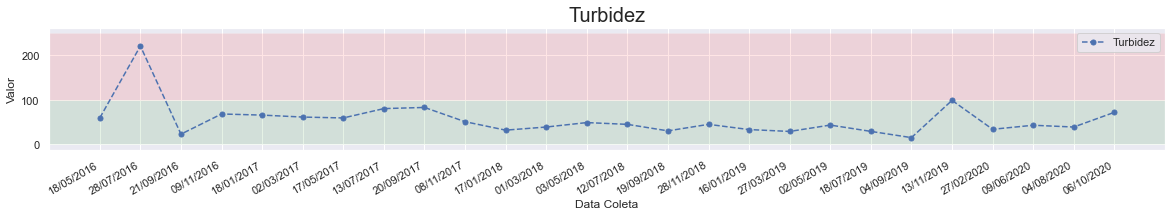

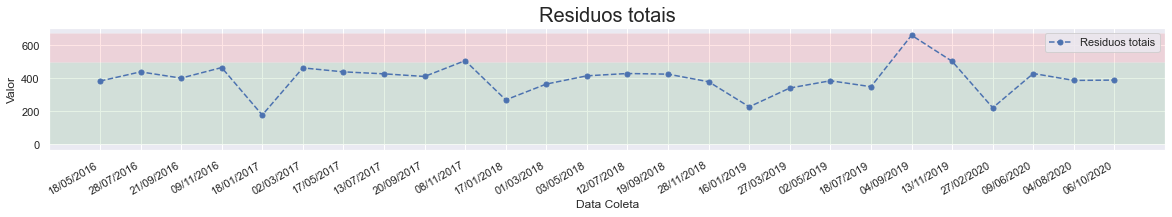

In [24]:
x = 20
y = 2.5
font= 20
def plot_graph(data,parametro, min_conama, max_conama, r1, r2):
    with sns.axes_style("darkgrid"):
        fig = plt.figure(figsize=(x, y))
        ax = fig.add_subplot(111)

        plt.plot(data['Data Coleta'], data['Valor'], '--o', markersize=5,label=parametro)
        plt.legend()
        plt.xlabel("Data Coleta")
        plt.ylabel("Valor")
        sns.axes_style("darkgrid")
        ax.axhspan(min_conama, max_conama, facecolor='green', alpha=0.1)
        ax.axhspan(r1, r2, facecolor='red', alpha=0.1)
        plt.gcf().autofmt_xdate()
        plt.title(parametro,fontsize=font)
        plt.show()
    


plot_graph(nit_total,"Nitrogenio", 0, 14.7, 14.7, 35)
plot_graph(pH_table,"Ph", 7, 8, 6.75, 7)
plot_graph(O2_table,"Oxigênio Dissolvido", 0, 2, 2, 7)
plot_graph(coliformes_termotolerantes_table,"Coliformes Termotolerantes", 0, 50, 50, 60)
plot_graph(fosforo_table,"Fosforo", 0, 0.15, 0.15, 5)
plot_graph(DBO_table,"DBO", 0, 10, 10, 170)
plot_graph(turbidez_table,"Turbidez", 0, 100, 100, 250)
plot_graph(sol_total,"Residuos totais", 0, 500, 500, 675)

## Fazendo IQA para 12/07/2018 - 28/11/2018

In [31]:
# print(sol_total.values[-11])
# print(sol_total.values[-12])
# print(sol_total.values[-13])

nit_28_11_18 = nit_total.Valor.values[-3]
nit_19_09_18 = nit_total.Valor.values[-4]
nit_12_07_18 = nit_total.Valor.values[-5]

pH_28_11_18 = pH_table.Valor.values[-11]
pH_19_09_18 = pH_table.Valor.values[-12]
pH_12_07_18 = pH_table.Valor.values[-13]

o2_28_11_18 = O2_table.Valor.values[-11]
o2_19_09_18 = O2_table.Valor.values[-12]
o2_12_07_18 = O2_table.Valor.values[-13]
# calculo da saturação pelo site
o2_28_11_18 = 10.53
o2_19_09_18 = 2.42
o2_12_07_18 = 5.57

fosforo_28_11_18 = fosforo_table.Valor.values[-11]
fosforo_19_09_18 = fosforo_table.Valor.values[-12]
fosforo_12_07_18 = fosforo_table.Valor.values[-13]

turbidez_28_11_18 = turbidez_table.Valor.values[-11]
turbidez_19_09_18 = turbidez_table.Valor.values[-12]
turbidez_12_07_18 = turbidez_table.Valor.values[-13]

DBO_28_11_18 = DBO_table.Valor.values[-8]
DBO_19_09_18 = DBO_table.Valor.values[-9]
DBO_12_07_18 = DBO_table.Valor.values[-10]

temp_ar_28_11_18 = temp_ar.Valor.values[-11]
temp_ar_19_09_18 = temp_ar.Valor.values[-12]
temp_ar_12_07_18 = temp_ar.Valor.values[-13]

temp_agua_28_11_18 = temp.Valor.values[-11]
temp_agua_19_09_18 = temp.Valor.values[-12]
temp_agua_12_07_18 = temp.Valor.values[-13]

delta_t_28_11_18 = temp_agua_28_11_18 - temp_ar_28_11_18
delta_t_19_09_18 = temp_agua_19_09_18 - temp_ar_19_09_18
delta_t_12_07_18 = temp_agua_12_07_18 - temp_ar_12_07_18

solidos_28_11_18 = sol_total.Valor.values[-11]
solidos_19_09_18 = sol_total.Valor.values[-12]
solidos_12_07_18 = sol_total.Valor.values[-13]
print(coliformes_termotolerantes_table.values[-13])
coli_termo_28_11_18 = coliformes_termotolerantes_table.Valor.values[-11]
coli_termo_19_09_18 = coliformes_termotolerantes_table.Valor.values[-12]
coli_termo_12_07_18 = coliformes_termotolerantes_table.Valor.values[-13]

['12/07/2018' '10:35' 'Escherichia coli**' 6.78710609303657 'UFC/100mL'
 '4- Microbiológicos' 6.78710609303657]


### para 28_11_18

In [32]:
print(f"nitrogenio 28_11_18: {nit_28_11_18}")
print(f"pH 28_11_18: {pH_28_11_18}")
print(f"O2 28_11_18: {o2_28_11_18}")
print(f"fosforo 28_11_18: {fosforo_28_11_18}")
print(f"turbidez 28_11_18: {turbidez_28_11_18}")
print(f"DBO 28_11_18: {DBO_28_11_18}")
print(f"pH 28_11_18: {pH_28_11_18}")
print(f"deltat 28_11_18: {delta_t_28_11_18}")
print(f"solidos 28_11_18: {solidos_28_11_18}")
print(f"coliformes (log10) 28_11_18: {coli_termo_28_11_18}")


nitrogenio 28_11_18: 21.4
pH 28_11_18: 7.44
O2 28_11_18: 10.53
fosforo 28_11_18: 2.4
turbidez 28_11_18: 45.0
DBO 28_11_18: 51.0
pH 28_11_18: 7.44
deltat 28_11_18: -1.2999999999999972
solidos 28_11_18: 380.0
coliformes (log10) 28_11_18: 6.559308010907013


In [33]:
print(f"nitrogenio 19_09_18: {nit_19_09_18}")
print(f"pH 19_09_18: {pH_19_09_18}")
print(f"O2 19_09_18: {o2_19_09_18}")
print(f"fosforo 19_09_18: {fosforo_19_09_18}")
print(f"turbidez 19_09_18: {turbidez_19_09_18}")
print(f"DBO 19_09_18: {DBO_19_09_18}")
print(f"pH 19_09_18: {pH_19_09_18}")
print(f"deltat 19_09_18: {delta_t_19_09_18}")
print(f"solidos 19_09_18: {solidos_19_09_18}")
print(f"coliformes (log10) 19_09_18: {coli_termo_19_09_18}")

nitrogenio 19_09_18: 24.0
pH 19_09_18: 7.51
O2 19_09_18: 2.42
fosforo 19_09_18: 3.19
turbidez 19_09_18: 30.4
DBO 19_09_18: 77.0
pH 19_09_18: 7.51
deltat 19_09_18: -2.1999999999999993
solidos 19_09_18: 426.0
coliformes (log10) 19_09_18: 6.720159303405957


In [34]:
print(f"nitrogenio 12_07_18: {nit_12_07_18}")
print(f"pH 12_07_18: {pH_12_07_18}")
print(f"O2 12_07_18: {o2_12_07_18}")
print(f"fosforo 12_07_18: {fosforo_12_07_18}")
print(f"turbidez 12_07_18: {turbidez_12_07_18}")
print(f"DBO 12_07_18: {DBO_12_07_18}")
print(f"pH 12_07_18: {pH_12_07_18}")
print(f"deltat 12_07_18: {delta_t_12_07_18}")
print(f"solidos 12_07_18: {solidos_12_07_18}")
print(f"coliformes (log10) 12_07_18: {coli_termo_12_07_18}")

nitrogenio 12_07_18: 27.3
pH 12_07_18: 7.41
O2 12_07_18: 5.57
fosforo 12_07_18: 3.32
turbidez 12_07_18: 45.0
DBO 12_07_18: 87.0
pH 12_07_18: 7.41
deltat 12_07_18: 1.3000000000000007
solidos 12_07_18: 430.0
coliformes (log10) 12_07_18: 6.78710609303657


In [35]:
#iqa fosforo
fosforo_iqa_28_11_18 = 24.1
fosforo_iqa_19_09_18 =17.51
fosforo_iqa_12_07_18 = 17.21

nit_iqa_28_11_18 = 32.8
nit_iqa_19_09_18 = 30.14
nit_iqa_12_07_18 = 27.45

o2_iqa_28_11_18 = 7.97
o2_iqa_19_09_18 = 4.13
o2_iqa_12_07_18 = 5.61

pH_iqa_28_11_18 = 92.38
pH_iqa_19_09_18 = 91.72
pH_iqa_12_07_18 = 92.38

turbidez_iqa_28_11_18 = 41.04
turbidez_iqa_19_09_18 = 51.72
turbidez_iqa_12_07_18 = 41.04

DBO_iqa_28_11_18 = 2
DBO_iqa_19_09_18 = 2
DBO_iqa_12_07_18 = 2

delta_t_iqa_28_11_18 = 85.19
delta_t_iqa_19_09_18 = 79.27
delta_t_iqa_12_07_18 = 85.19

solidos_iqa_28_11_18 = 50.07
solidos_iqa_19_09_18 = 42.80
solidos_iqa_12_07_18 = 41.81

colifomes_iqa_28_11_18 = 3
colifomes_iqa_19_09_18 = 3
colifomes_iqa_12_07_18 = 3

### iqa 28_11_18

In [36]:
w_O2 = 0.17
w_coli = 0.15
w_pH = 0.12
w_DBO = 0.10
w_DT = 0.10
w_NT = 0.10
w_FT = 0.10
w_TU = 0.08
w_ST = 0.08
lista_iqa = [fosforo_iqa_28_11_18,w_FT,pH_iqa_28_11_18,w_pH,o2_iqa_28_11_18,w_O2,turbidez_iqa_28_11_18,w_TU,DBO_iqa_28_11_18,
             w_DBO,delta_t_iqa_28_11_18,w_DT,nit_iqa_28_11_18,w_NT,solidos_iqa_28_11_18,w_ST,colifomes_iqa_28_11_18,w_coli]
def calcula_iqa_por_lista(lista_iqa):    
    i = 0
    IQA =1
    while i < len(lista_iqa):
        IQA *= lista_iqa[i]**lista_iqa[i+1]
        i+=2
    return IQA
iqa_28_11_18=calcula_iqa_por_lista(lista_iqa)
print(iqa_28_11_18)

17.323642120190605


### iqa 19_09_18

In [37]:

lista_iqa = [fosforo_iqa_19_09_18,w_FT,pH_iqa_19_09_18,w_pH,o2_iqa_19_09_18,w_O2,turbidez_iqa_19_09_18,w_TU,DBO_iqa_19_09_18,
             w_DBO,delta_t_iqa_19_09_18,w_DT,nit_iqa_19_09_18,w_NT,solidos_iqa_19_09_18,w_ST,colifomes_iqa_19_09_18,w_coli]

iqa_19_09_18=calcula_iqa_por_lista(lista_iqa)
print(iqa_19_09_18)

14.847057487938002


### 12_07_18

In [38]:
lista_iqa = [fosforo_iqa_12_07_18,w_FT,pH_iqa_12_07_18,w_pH,o2_iqa_12_07_18,w_O2,turbidez_iqa_12_07_18,w_TU,DBO_iqa_12_07_18,
             w_DBO,delta_t_iqa_12_07_18,w_DT,nit_iqa_12_07_18,w_NT,solidos_iqa_12_07_18,w_ST,colifomes_iqa_12_07_18,w_coli]

iqa_12_07_18=calcula_iqa_por_lista(lista_iqa)
print(iqa_12_07_18)

15.278981830661968


In [39]:
zeroData = IQA_table[IQA_table["Data Coleta"] == '10/03/2011']
firstData = IQA_table[IQA_table["Data Coleta"] == '19/05/2011']
secondData = IQA_table[IQA_table["Data Coleta"] == '20/01/2016']
thirdData = IQA_table[IQA_table["Data Coleta"] == '27/02/2020']

In [40]:
# pH_table = res1[res1["Parametro"] == 'pH']
# coli_termo_table = res1[res1["Parametro"] == 'Coliformes Termotolerantes']
# fosforo_table = res1[res1["Parametro"] == 'Fósforo Total']
# O2_table = res1[res1["Parametro"] == 'Oxigênio Dissolvido']
# turbidez_table = res1[res1["Parametro"] == 'Turbidez']
# DBO_table = res1[res1["Parametro"] == 'DBO (5, 20)']
# temp = res1[res1["Parametro"] == 'Temperatura da Água']
# nit_total = res1[res1["Parametro"] == 'Nitrogênio Total']
# fos_total = res1[res1["Parametro"] == 'Fósforo Total']
# sol_total = res1[res1["Parametro"] == 'Sólido Total']
# temp_ar = res1[res1["Parametro"] == 'Temperatura do Ar']
#pH_table["Data Coleta"] = pH_table["Data Coleta"][-4:]

pH_table_18=pH_table.loc[(pH_table.index >= 10) & (pH_table.index <= 723)]
fosforo_table_18=fosforo_table.loc[(fosforo_table.index >= 494) & (fosforo_table.index <=749)]
O2_table_18=O2_table.loc[(O2_table.index >= 541) & (O2_table.index <= 740)]
turbidez_table_18=turbidez_table.loc[(turbidez_table.index >= 133) & (turbidez_table.index <= 733)]
DBO_table_18=DBO_table.loc[(DBO_table.index >= 424) & (DBO_table.index <= 741)]
temp_18=temp.loc[(temp.index >= 21) & (temp.index <= 724)]
nit_total_18=nit_total.loc[(nit_total.index >= 338) & (nit_total.index <= 769)]
sol_total_18=sol_total.loc[(sol_total.index >= 453) & (sol_total.index <= 744)]
temp_ar_18=temp_ar.loc[(temp_ar.index >= 32) & (temp_ar.index <= 725)]
coliformes_termotolerantes_table_18=coliformes_termotolerantes_table.loc[(coliformes_termotolerantes_table.index >= 43) & 
                                     (coliformes_termotolerantes_table.index <= 727)]

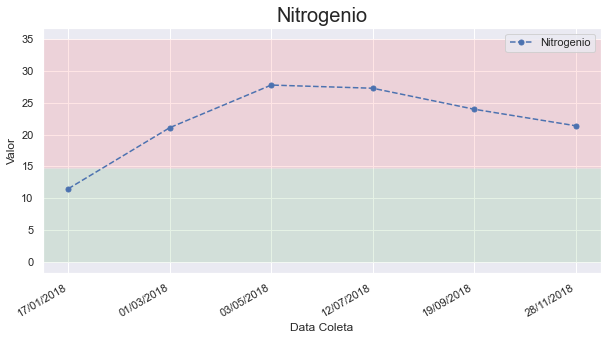

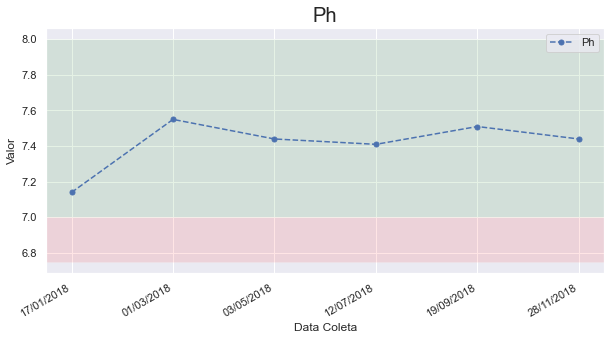

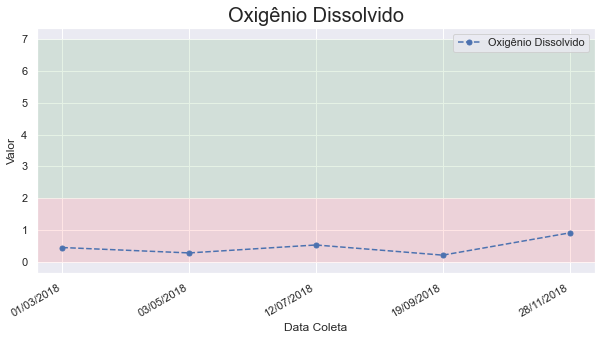

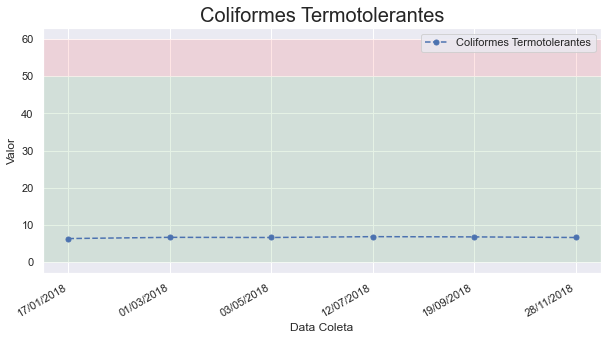

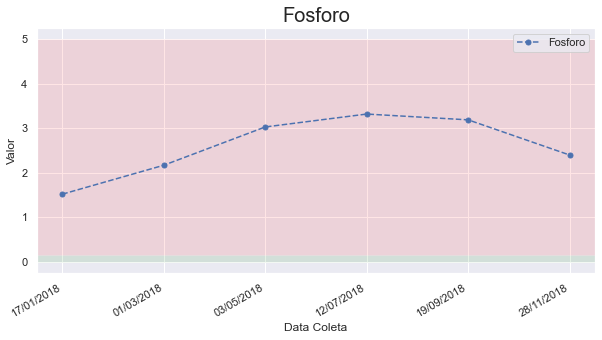

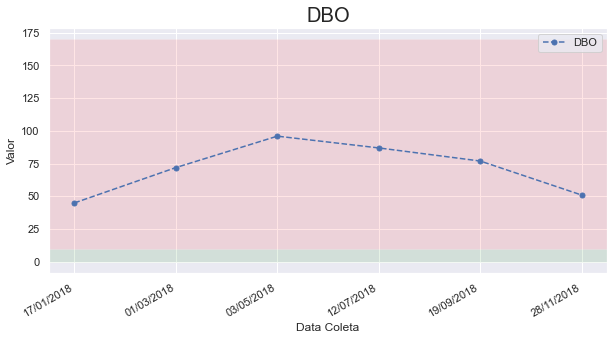

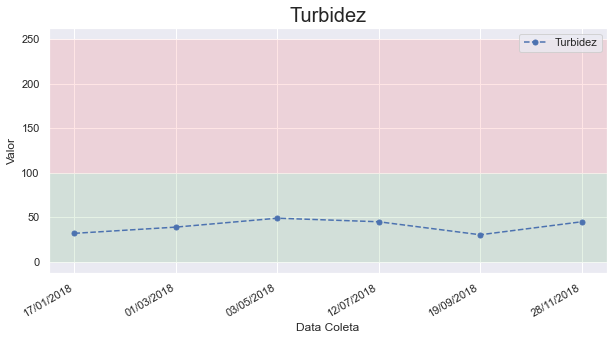

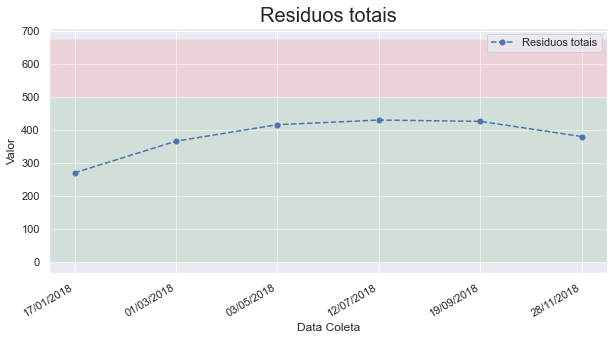

In [41]:
x = 10
y = 5
font= 20

plot_graph(nit_total_18,"Nitrogenio",0, 14.7, 14.7, 35)
plot_graph(pH_table_18,"Ph", 7, 8, 6.75, 7)
plot_graph(O2_table_18,"Oxigênio Dissolvido", 2, 7, 0, 2)
plot_graph(coliformes_termotolerantes_table_18,"Coliformes Termotolerantes", 0, 50, 50, 60)
plot_graph(fosforo_table_18,"Fosforo", 0, 0.15, 0.15, 5)
plot_graph(DBO_table_18,"DBO", 0, 10, 10, 170)
plot_graph(turbidez_table_18,"Turbidez", 0, 100, 100, 250)
plot_graph(sol_total_18,"Residuos totais", 0, 500, 500, 675)

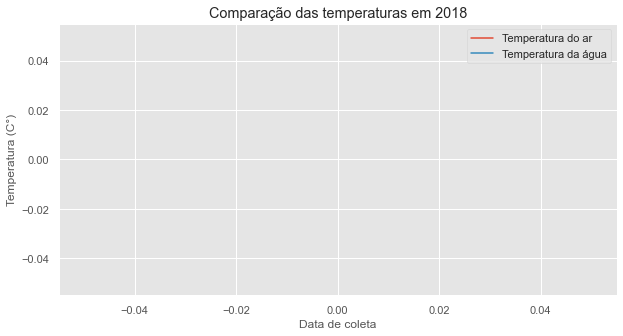

In [49]:
import matplotlib
matplotlib.style.use('ggplot')
fig = plt.figure(figsize=(x, y))
#ax = fig.add_subplot(111)
# sns.lineplot(data=temp_ar.loc[(temp_ar.index >= 1342) & (temp_ar.index <= 2059)], 
#              x="Data Coleta", y="Valor", hue="Parametro")
plt.plot(temp_ar.loc[(temp_ar.index >= 1342) & (temp_ar.index <= 2059), "Data Coleta"],
         temp_ar.loc[(temp_ar.index >= 1342) & (temp_ar.index <= 2059), "Valor"],label="Temperatura do ar")
plt.plot(temp.loc[(temp.index >= 1331) & (temp.index <= 2059), "Data Coleta"],
         temp.loc[(temp.index >= 1331) & (temp.index <= 2059), "Valor"],label="Temperatura da água")
plt.legend()
plt.title("Comparação das temperaturas em 2018")
plt.ylabel("Temperatura (C°)")
plt.xlabel("Data de coleta")
plt.grid(True)
# sns.lineplot(data=temp.loc[(temp.index >= 1331) & (temp.index <= 2059)]
# , x="Data Coleta", y="Valor", hue="Parametro")

### Gráficos dos parâmetros do IQA
<img src="Graficos.png">

### Cálculo do IQA

In [50]:
w_O2 = 0.17
w_coli = 0.15
w_pH = 0.12
w_DBO = 0.10
w_DT = 0.10
w_NT = 0.10
w_FT = 0.10
w_TU = 0.08
w_ST = 0.08

In [51]:
coli_termo_table = res1[res1["Parametro"] == 'Coliformes Termotolerantes']
fosforo_table = res1[res1["Parametro"] == 'Fósforo Total']
O2_table = res1[res1["Parametro"] == 'Oxigênio Dissolvido']
turbidez_table = res1[res1["Parametro"] == 'Turbidez']
DBO_table = res1[res1["Parametro"] == 'DBO (5, 20)']
temp = res1[res1["Parametro"] == 'Temperatura da Água']
nit_total = res1[res1["Parametro"] == 'Nitrogênio Total']
fos_total = res1[res1["Parametro"] == 'Fósforo Total']
sol_total = res1[res1["Parametro"] == 'Sólido Total']

In [52]:
coli = 1

In [53]:
def calc_qta(q_O2, q_CF, q_pH, q_DBO, q_NT, q_TU, q_DT, q_ST,q_FT):
    f_O2 = 100.8*math.exp(((q_O2 - 106)**2)/-3745)
    f_CF = 98.03 - 36.45*log(q_CF) + 3.138*log10(q_CF)**2 + 0.06776*log10(q_CF)**2
    f_pH = 0.05421*q_pH**(1.23*q_pH -0.09873*q_pH**2) + 5.213
    f_DBO = 102.6*math.exp(-0.1101*q_DBO)
    f_FT = 213.7*math.exp(-1.680*(q_FT)**0.3325)
    f_NT = 98.96*q_NT**(-0.2232-0.006457*q_NT)
    f_TU = 97.34*math.exp(-0.01139*q_TU - 0.04917*sqrt(q_TU))
    f_delta_T = 1/(0.0003869*(q_DT + 0.1815)**2 + 0.01081)
    f_ST = 80.26*math.exp(-0.00107*q_ST + 0.03009*sqrt(q_ST)) - 0.1185*q_ST
    
    res_O2 = f_O2**w_O2
    #res_CF = f_CF**w_CF
    res_CF = 1
    res_pH = f_pH**w_pH
    res_DBO = f_DBO**w_DBO
    res_FT = f_FT**w_FT
    res_NT = f_NT**w_NT
    res_TU = f_TU**w_TU
    res_DT = f_delta_T**w_DT
    res_ST = f_ST**w_ST
    
    iqa = res_O2*res_CF*res_pH*res_DBO*res_FT*res_NT*res_TU*res_DT*res_ST
    return iqa
calc_qta(10,1,7.2,9,19,72,7.5,390,4)
    


16.76037528746809

### Calculando IQA para ultimo registro (06/10/2020)
#### Fósforo
<img src="img/fosforo_2020.png">

#### PH
<img src="img/ph_2020.png">

#### Oxigênio
<img src="img/oxigenio_2020.png">

#### Turbidez
<img src="img/turbidez_2020.png">

#### DBO
<img src="img/dbo_2020.png">

#### temp
<img src="img/temperatura_2020.png">

#### Nitrogenio (2019)
<img src="img/nitrogenio_2019.png">

#### Residuos
<img src="img/residuo_2020.png">


In [54]:

fosforo_iqa = 15
ph_iqa =91
o2_iqa = 12
turbidez_iqa = 27
dbo_iqa = 35
temp_iqa = 32
nitrogenio_iqa = 37
residuo_iqa = 50



lista_iqa = [fosforo_iqa,w_FT,ph_iqa,w_pH,o2_iqa,w_O2,turbidez_iqa,w_TU,dbo_iqa,
             w_DBO,temp_iqa,w_DT,nitrogenio_iqa,w_NT,residuo_iqa,w_ST]
def calcula_iqa_por_lista(lista_iqa):    
    i = 0
    IQA =1
    while i < len(lista_iqa):
        IQA *= lista_iqa[i]**lista_iqa[i+1]
        i+=2
    return IQA
iqa_por_imagem=calcula_iqa_por_lista(lista_iqa)
calc_por_eq=calc_qta(10,1,7.2,9,19,72,7.5,390,4)
print(f"IQA por imagem: {iqa_por_imagem}\nIQA por equação: {calc_por_eq}\nDiferença de {iqa_por_imagem-calc_por_eq}")

IQA por imagem: 17.714283096369815
IQA por equação: 16.76037528746809
Diferença de 0.9539078089017252


#### Sem nitrogênio

In [55]:

nitrogenio_iqa = 1
lista_iqa = [fosforo_iqa,w_FT,ph_iqa,w_pH,o2_iqa,w_O2,turbidez_iqa,w_TU,dbo_iqa,
             w_DBO,temp_iqa,w_DT,1,w_NT,residuo_iqa,w_ST]
def calcula_iqa_por_lista(lista_iqa):    
    i = 0
    IQA =1
    while i < len(lista_iqa):
        IQA *= lista_iqa[i]**lista_iqa[i+1]
        i+=2
    return IQA
calcula_iqa_por_lista(lista_iqa)

12.345350043765926

In [56]:
lista_parametro= ['pH', 'Coliformes Termotolerantes','Fósforo Total','Oxigênio Dissolvido','Turbidez', 'DBO (5, 20)',
                 'Temperatura da Água','Nitrogênio Total','Fósforo Total','Sólido Total','']
res2 = res1
res2[res2["Parametro"]] = res2["Valor"]
res2

ValueError: Must have equal len keys and value when setting with an iterable

In [57]:
list_dates = ["Janeiro", "Março", "Maio", "Julho", "Setembro", "Novembro"]
list_iqas  = [12.916815854101033, 13.628124417264427, 15.052842540853282, 
              iqa_12_07_18, iqa_19_09_18, iqa_28_11_18]
list_dates
s1 = pd.Series([list_dates, list_iqas], index=['Meses', 'IQAs'], name='s1')

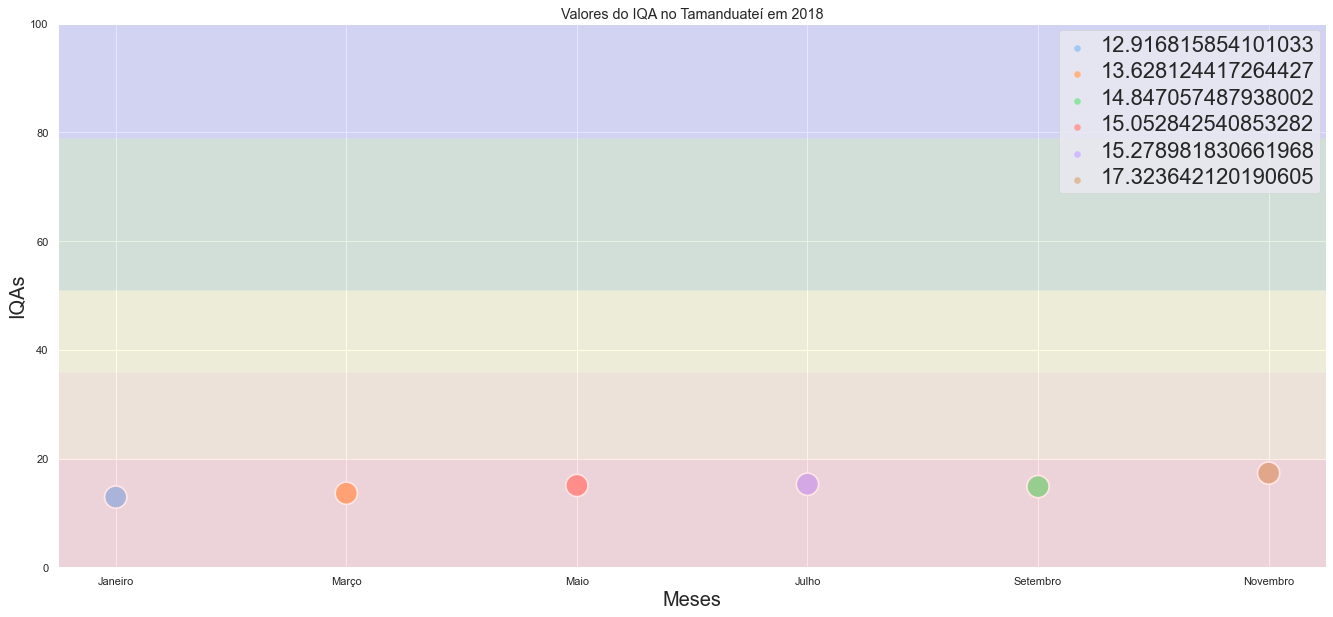

In [58]:
#sns.set(font_scale=3)
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(50, 10))
    ax = fig.add_subplot(121)
    ax.set_ylim([0, 100])
    ax.set_xlabel('Meses',fontsize = 20)
    ax.set_ylabel('IQAs', fontsize = 20)
    ax.set_title('Valores do IQA no Tamanduateí em 2018')
    ax.axhspan(0, 20, facecolor='red', alpha=0.1)
    ax.axhspan(20, 36, facecolor='orange', alpha=0.1)
    ax.axhspan(36, 51, facecolor='yellow', alpha=0.1)
    ax.axhspan(51, 79, facecolor='green', alpha=0.1)
    ax.axhspan(79, 100, facecolor='blue', alpha=0.1)
    sns.scatterplot(x='Meses', y='IQAs', hue="IQAs",palette="pastel", data=s1, s=500)
    ax.legend(loc=1, prop={'size': 13})
    plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
    plt.savefig('IQAs_todos.png')
    plt.show()

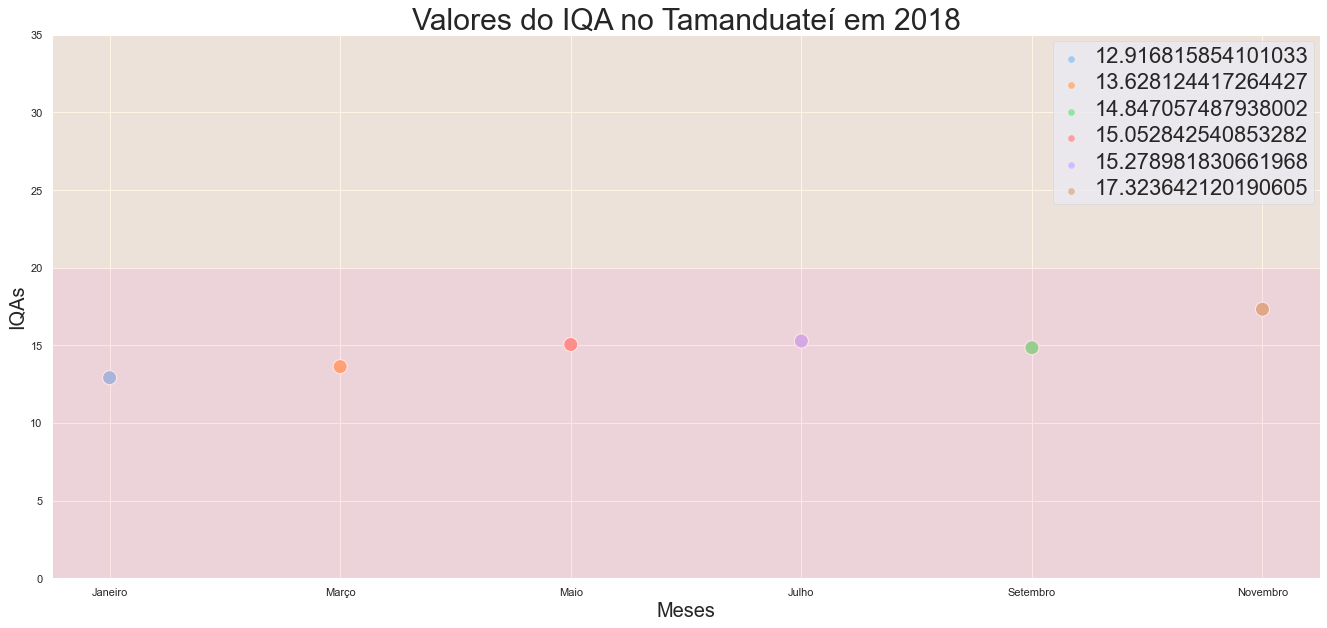

In [59]:
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(50, 10))
    ax = fig.add_subplot(121)
    ax.set_ylim([0, 35])
    ax.set_title('Valores do IQA no Tamanduateí em 2018', fontsize= 30)
    ax.set_xlabel('Meses',fontsize = 20)
    ax.set_ylabel('IQAs', fontsize = 20)
    ax.axhspan(0, 20, facecolor='red', alpha=0.1)
    ax.axhspan(20, 36, facecolor='orange', alpha=0.1)
    sns.scatterplot(x='Meses', y='IQAs', hue="IQAs",palette="pastel", data=s1, s=200)
    #plt.plot(s1["Meses"], s1["IQAs"], c="g")
    ax.legend(loc=1, prop={'size': 13})
    plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
    plt.savefig('IQAs.png')
    plt.show()